In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dabur = pd.read_csv("DABUR-2006-2010.csv")
godrej = pd.read_csv('GODREJCP-2006-2010.csv')
hindu = pd.read_csv('HINDUNILVR-2006-2010.csv')
itc = pd.read_csv('ITC-2006-2010.csv')

In [27]:
dabur['Date'] = pd.to_datetime(dabur['Date'], infer_datetime_format=True)
dabur['Date'] = pd.to_datetime(dabur['Date']).dt.date

godrej['Date'] = pd.to_datetime(godrej['Date'], infer_datetime_format=True)
godrej['Date'] = pd.to_datetime(godrej['Date']).dt.date

hindu['Date'] = pd.to_datetime(hindu['Date'], infer_datetime_format=True)
hindu['Date'] = pd.to_datetime(hindu['Date']).dt.date

itc['Date'] = pd.to_datetime(itc['Date'], infer_datetime_format=True)
itc['Date'] = pd.to_datetime(itc['Date']).dt.date

In [28]:
dabur = dabur.set_index('Date')
godrej = godrej.set_index('Date')
hindu = hindu.set_index('Date')
itc = itc.set_index('Date')

In [29]:
dabur.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,35.17,36.20,35.09,35.63,856142
2006-01-03,35.84,36.17,35.56,35.72,592970
2006-01-04,36.00,36.00,34.84,35.02,1148949
2006-01-05,35.17,35.59,34.11,34.34,1201353
2006-01-06,34.17,35.84,34.17,35.70,871521


In [30]:
godrej.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,43.20,43.93,43.19,43.48,4722
2006-01-03,43.35,43.68,42.69,43.11,3156
2006-01-04,44.01,44.50,42.69,43.27,5855
2006-01-05,43.11,43.52,42.98,43.52,23725
2006-01-06,43.11,43.68,43.02,43.52,4241


In [31]:
hindu.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,199.50,199.50,194.55,195.10,855427
2006-01-03,195.50,197.45,194.65,196.25,956939
2006-01-04,196.25,197.10,194.55,195.05,1652591
2006-01-05,195.90,196.80,194.10,194.80,1142455
2006-01-06,194.25,195.45,190.25,193.50,1892812


In [32]:
itc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,47.33,47.58,44.00,46.70,3724644
2006-01-03,46.98,48.08,46.77,47.70,6264778
2006-01-04,48.00,49.57,48.00,48.98,12511367
2006-01-05,49.02,49.57,48.17,48.47,4651288
2006-01-06,48.67,48.75,47.30,48.48,9578029


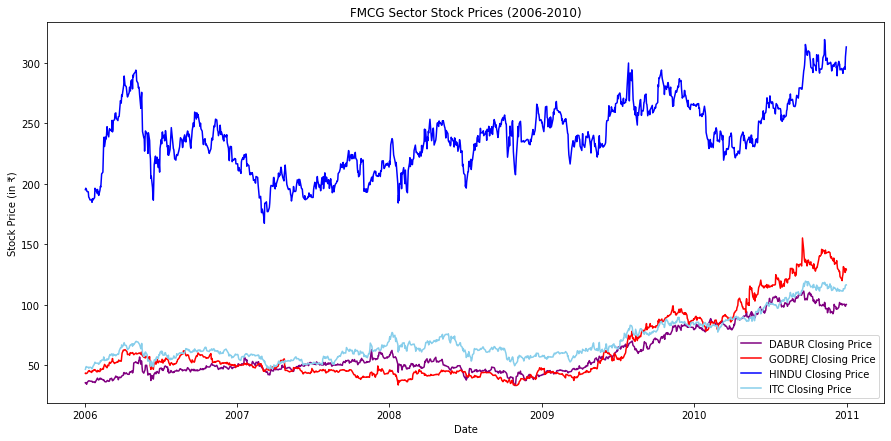

In [33]:
plt.figure(figsize=(15,7))
dabur['Close'].plot(label='DABUR Closing Price', color = 'purple')
godrej['Close'].plot(label='GODREJ Closing Price', color = 'red')
hindu['Close'].plot(label='HINDU Closing Price', color = 'blue')
itc['Close'].plot(label='ITC Closing Price', color ='skyblue')
plt.title("FMCG Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in ₹)")
plt.legend()

In [34]:
hindu.iloc[[hindu['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2006-02-14,210.0,226.8,205.75,224.45,18132894


In [35]:
godrej.iloc[[godrej['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2008-03-24,41.33,43.67,41.33,43.32,3836487


In [36]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
dabur['Total Traded'] = dabur['Open'] * dabur['Volume']
godrej['Total Traded'] = godrej['Open'] * godrej['Volume']
hindu['Total Traded'] = hindu['Open'] * hindu['Volume']
itc['Total Traded'] = itc['Open'] * itc['Volume']

Text(0.5, 1.0, 'Market Capitalisation of DABUR, GODREj, HINDU, ITC (2006-2010)')

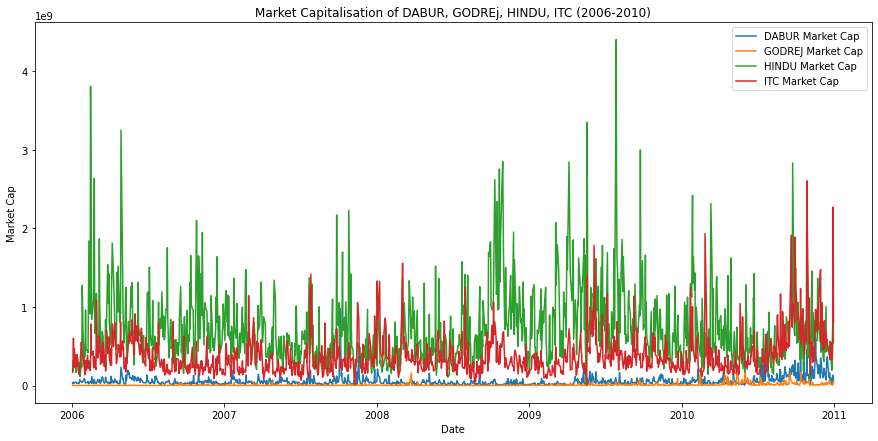

In [38]:
plt.figure(figsize = (15,7))
dabur['Total Traded'].plot(label = 'DABUR Market Cap')
godrej['Total Traded'].plot(label = 'GODREJ Market Cap')
hindu['Total Traded'].plot(label = 'HINDU Market Cap')
itc['Total Traded'].plot(label = 'ITC Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of DABUR, GODREj, HINDU, ITC (2006-2010)')

In [39]:
hindu.iloc[[hindu['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2009-07-28,302.0,305.95,273.25,276.65,14579109,4.402891e+09


In [40]:
itc.iloc[[itc['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2010-10-28,112.77,114.47,110.0,111.37,23103660,2.605400e+09


In [41]:
from pandas.plotting import scatter_matrix

In [42]:
fmcg = pd.concat([dabur['Open'], godrej['Open'], hindu['Open'], itc['Open']], axis = 1)
fmcg.columns = ['DABUR Open', 'GODREJ Open', 'HINDU Open', 'ITC Open']

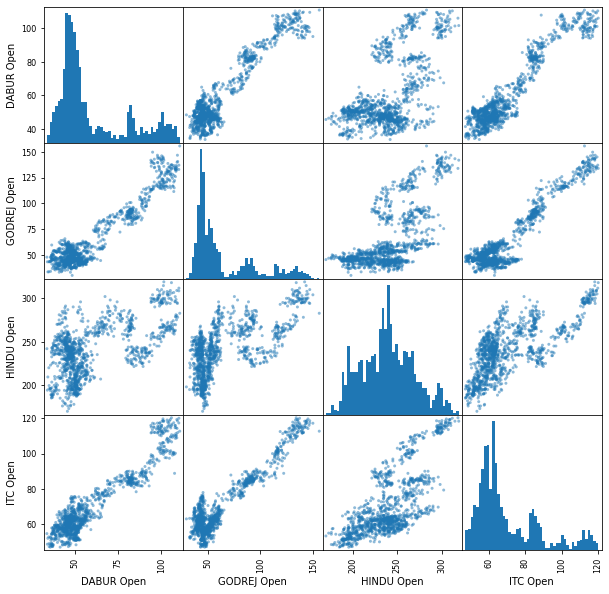

In [43]:
scatter_matrix(fmcg, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [44]:
dabur['returns'] = (dabur['Close']/dabur['Close'].shift(1)) - 1
godrej['returns'] = (godrej['Close']/godrej['Close'].shift(1)) - 1
hindu['returns'] = (hindu['Close']/hindu['Close'].shift(1)) - 1
itc['returns'] = (itc['Close']/itc['Close'].shift(1)) - 1

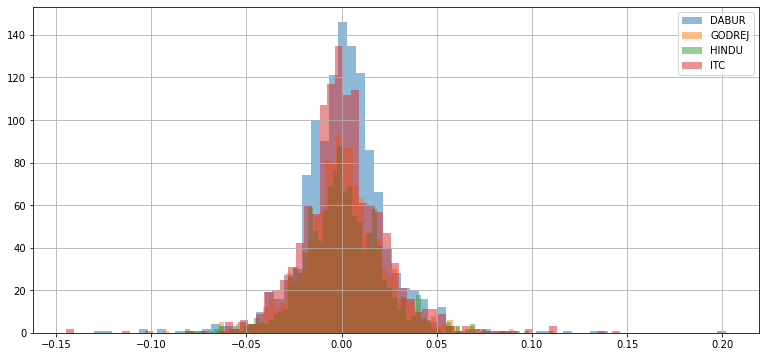

In [45]:
dabur['returns'].hist(bins = 70, label = 'DABUR', alpha = 0.5, figsize = (13, 6))
itc['returns'].hist(bins = 70, label = 'GODREJ', alpha = 0.5)
hindu['returns'].hist(bins = 70, label = 'HINDU', alpha = 0.5)
godrej['returns'].hist(bins = 70, label = 'ITC', alpha = 0.5)
plt.legend()

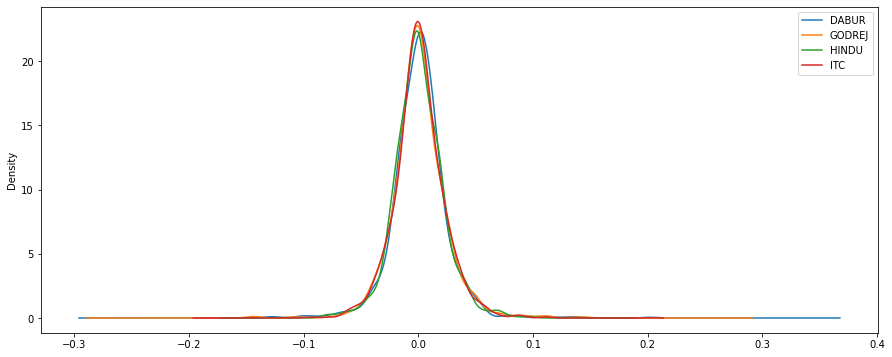

In [46]:
dabur['returns'].plot(kind='kde', label = 'DABUR', figsize = (15, 6))
godrej['returns'].plot(kind='kde', label = 'GODREJ')
hindu['returns'].plot(kind='kde', label = 'HINDU')
itc['returns'].plot(kind='kde', label = 'ITC')
plt.legend()

<AxesSubplot:>

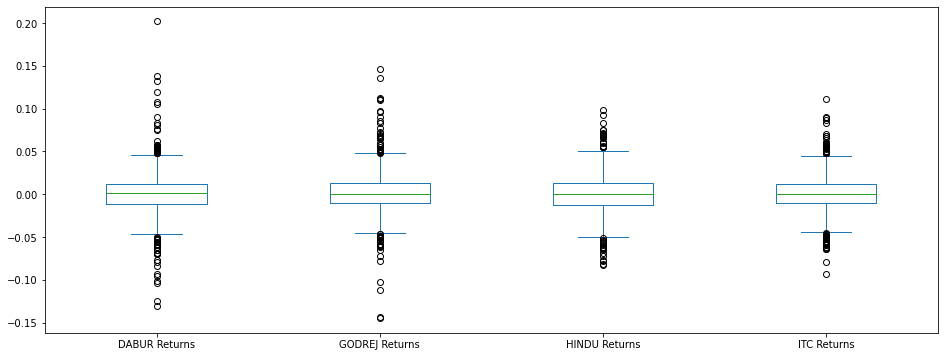

In [47]:
box_df =  pd.concat([dabur['returns'], godrej['returns'], hindu['returns'], itc['returns']], axis = 1)
box_df.columns = ['DABUR Returns', 'GODREJ Returns', 'HINDU Returns', 'ITC Returns']
box_df.plot(kind = 'box', figsize = (16,6))

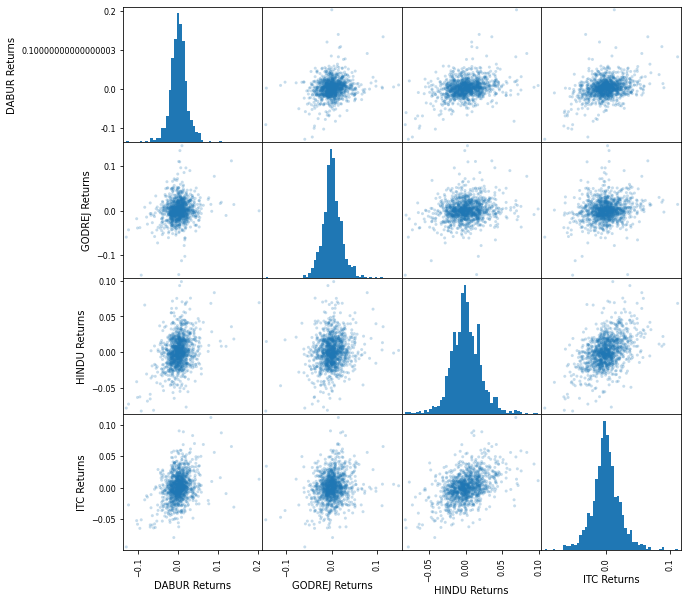

In [48]:
scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [49]:
dabur['cumulative_returns'] = (1 + dabur['returns']).cumprod()
godrej['cumulative_returns'] = (1 + godrej['returns']).cumprod()
hindu['cumulative_returns'] = (1 + hindu['returns']).cumprod()
itc['cumulative_returns'] = (1 + itc['returns']).cumprod()

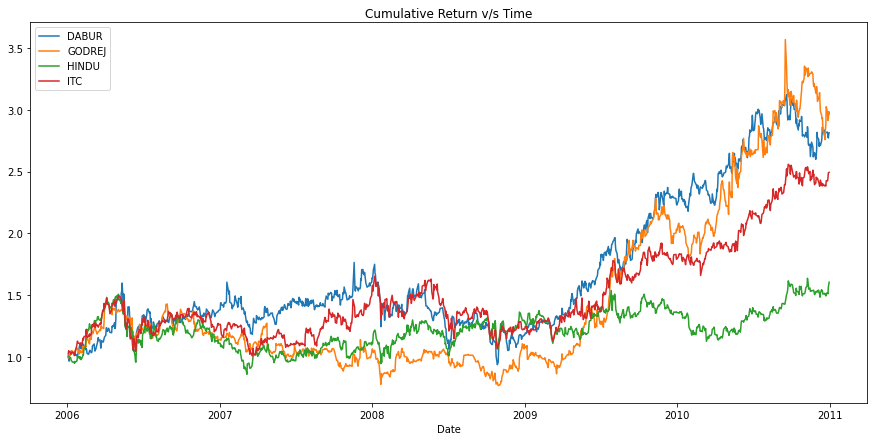

In [50]:
dabur['cumulative_returns'].plot(label='DABUR', figsize = (15, 7))
godrej['cumulative_returns'].plot(label='GODREJ')
hindu['cumulative_returns'].plot(label='HINDU')
itc['cumulative_returns'].plot(label='ITC')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()

### American Companies

In [51]:
coca = pd.read_csv('CocaCola-2006-2010.csv')
jnj = pd.read_csv('JNJ-2006-2010.csv')
mnst = pd.read_csv('MNST-2006-2010.csv')
pep = pd.read_csv('PEP-2006-2010.csv')

In [52]:
coca['Date'] = pd.to_datetime(coca['Date'], infer_datetime_format=True)
coca['Date'] = pd.to_datetime(coca['Date']).dt.date
jnj['Date'] = pd.to_datetime(jnj['Date'], infer_datetime_format=True)
jnj['Date'] = pd.to_datetime(jnj['Date']).dt.date
mnst['Date'] = pd.to_datetime(mnst['Date'], infer_datetime_format=True)
mnst['Date'] = pd.to_datetime(mnst['Date']).dt.date
pep['Date'] = pd.to_datetime(pep['Date'], infer_datetime_format=True)
pep['Date'] = pd.to_datetime(pep['Date']).dt.date

In [53]:
coca = coca.set_index('Date')
jnj = jnj.set_index('Date')
mnst = mnst.set_index('Date')
pep = pep.set_index('Date')


In [54]:
coca.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,20.40,20.50,20.18,20.45,6820400
2006-01-04,20.50,20.54,20.33,20.41,9996600
2006-01-05,20.36,20.57,20.29,20.51,8306700
2006-01-06,20.53,20.78,20.43,20.71,8561400
2006-01-09,20.75,20.84,20.63,20.81,6909900


In [55]:
jnj.head()


,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,61.07,61.85,61.05,61.63,10703200
2006-01-04,61.93,62.64,61.76,62.58,9068100
2006-01-05,62.57,62.95,62.10,62.32,9852600
2006-01-06,62.36,62.74,62.14,62.60,5919300
2006-01-09,62.52,63.01,62.43,62.99,7103700


In [56]:
mnst.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,1.68,1.73,1.66,1.73,731318
2006-01-04,1.72,1.75,1.70,1.72,743265
2006-01-05,1.72,1.73,1.68,1.70,495992
2006-01-06,1.71,1.79,1.70,1.78,1003861
2006-01-09,1.80,1.92,1.80,1.88,2081228


In [57]:
pep.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,59.92,59.92,58.93,59.76,4424100
2006-01-04,59.55,59.97,59.35,59.73,3380500
2006-01-05,59.61,59.88,59.19,59.38,3054100
2006-01-06,59.60,59.74,59.24,59.60,3051800
2006-01-09,59.61,59.61,59.20,59.30,4769700


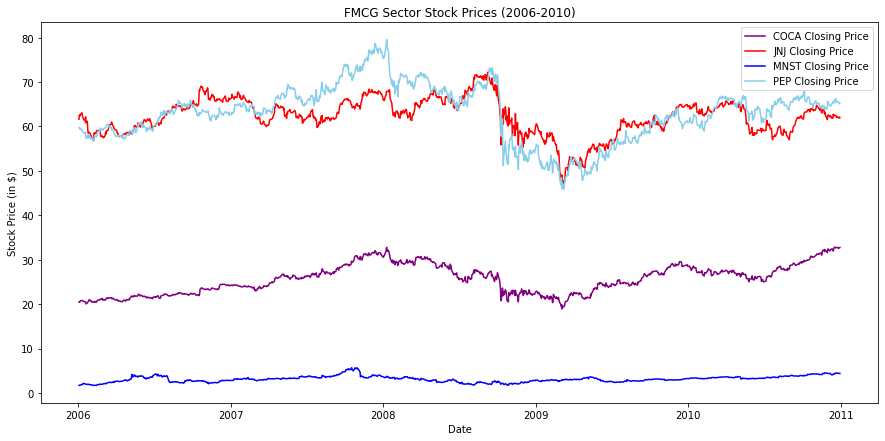

In [58]:
plt.figure(figsize=(15,7))
coca['Close'].plot(label='COCA Closing Price', color = 'purple')
jnj['Close'].plot(label='JNJ Closing Price', color = 'red')
mnst['Close'].plot(label='MNST Closing Price', color = 'blue')
pep['Close'].plot(label='PEP Closing Price', color ='skyblue')
plt.title("FMCG Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in $)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

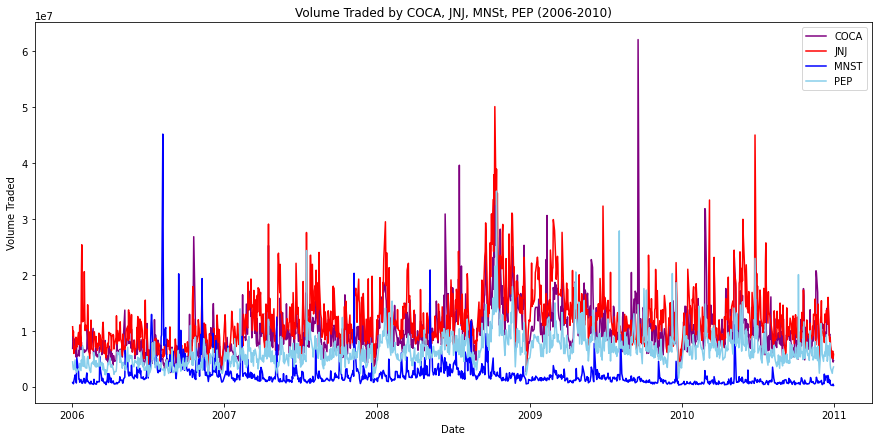

In [59]:
plt.figure(figsize=(15,7))
coca['Volume'].plot(label='COCA', color = 'purple')
jnj['Volume'].plot(label='JNJ', color = 'red')
mnst['Volume'].plot(label='MNST', color = 'blue')
pep['Volume'].plot(label='PEP', color ='skyblue')
plt.title("Volume Traded by COCA, JNJ, MNSt, PEP (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [60]:
coca.iloc[[coca['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-09-18,26.84,27.06,26.65,26.88,62086900


In [61]:
mnst.iloc[[mnst['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2006-08-07,2.68,2.86,2.48,2.49,45179328


In [62]:
coca['Total Traded'] = coca['Open'] * coca['Volume']
jnj['Total Traded'] = jnj['Open'] * jnj['Volume']
mnst['Total Traded'] = mnst['Open'] * mnst['Volume']
pep['Total Traded'] = pep['Open'] * pep['Volume']

Text(0.5, 1.0, 'Market Capitalisation of COCA, JNJ, MNST, PEP(2006-2010)')

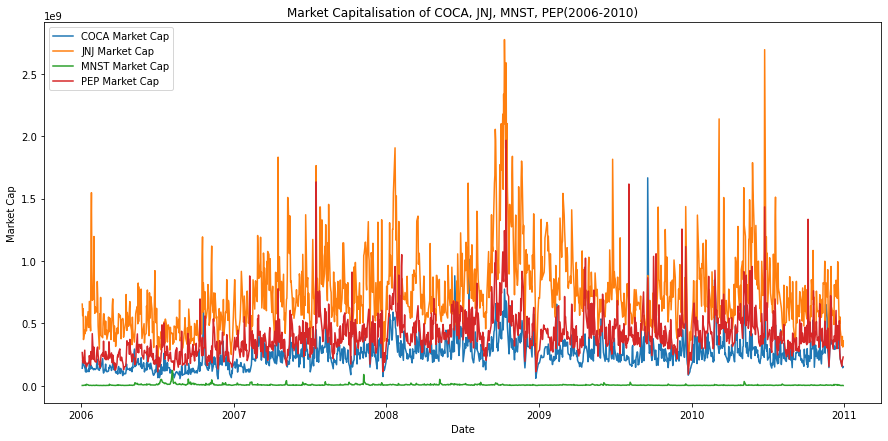

In [63]:
plt.figure(figsize = (15,7))
coca['Total Traded'].plot(label = 'COCA Market Cap')
jnj['Total Traded'].plot(label = 'JNJ Market Cap')
mnst['Total Traded'].plot(label = 'MNST Market Cap')
pep['Total Traded'].plot(label = 'PEP Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of COCA, JNJ, MNST, PEP(2006-2010)')

In [64]:
jnj.iloc[[jnj['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2008-10-10,55.4,59.0,52.06,55.85,50095420,2.775286e+09


In [65]:
from pandas.plotting import scatter_matrix
fmcgA = pd.concat([coca['Open'], jnj['Open'],mnst['Open'], pep['Open']], axis = 1)
fmcgA.columns = ['coca Open', 'jnj Open', 'mnst Open', 'pep Open']

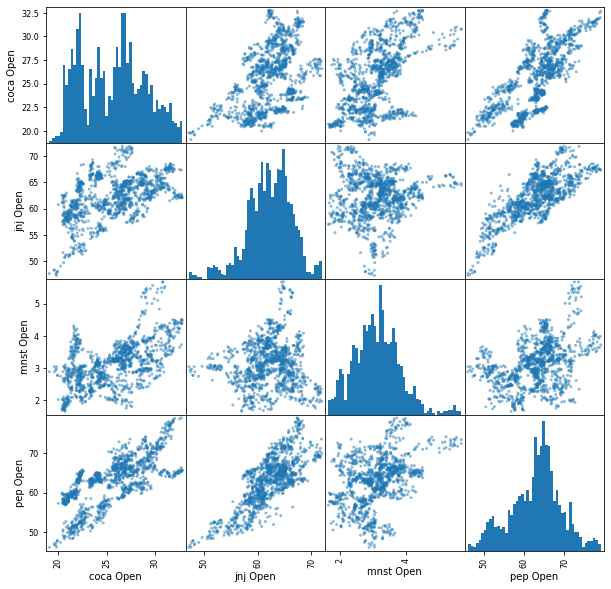

In [66]:
scatter_matrix(fmcgA, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [67]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
coca['returns'] = (coca['Close']/coca['Close'].shift(1)) - 1
jnj['returns'] = (jnj['Close']/jnj['Close'].shift(1)) - 1
mnst['returns'] = (mnst['Close']/mnst['Close'].shift(1)) - 1
pep['returns'] = (pep['Close']/pep['Close'].shift(1)) - 1

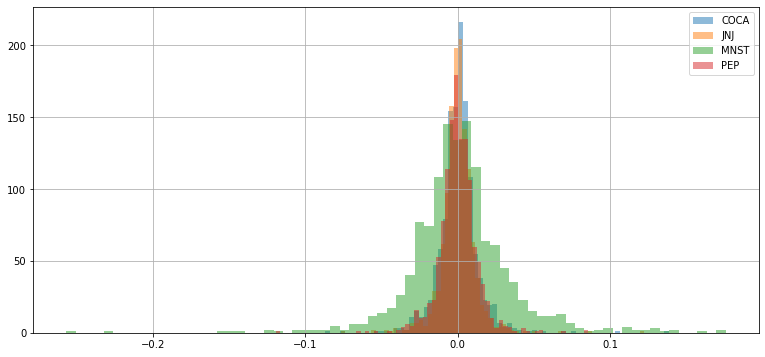

In [69]:
coca['returns'].hist(bins = 70, label = 'COCA', alpha = 0.5, figsize = (13, 6))
jnj['returns'].hist(bins = 70, label = 'JNJ', alpha = 0.5)
mnst['returns'].hist(bins = 70, label = 'MNST', alpha = 0.5)
pep['returns'].hist(bins = 70, label = 'PEP', alpha = 0.5)
plt.legend()


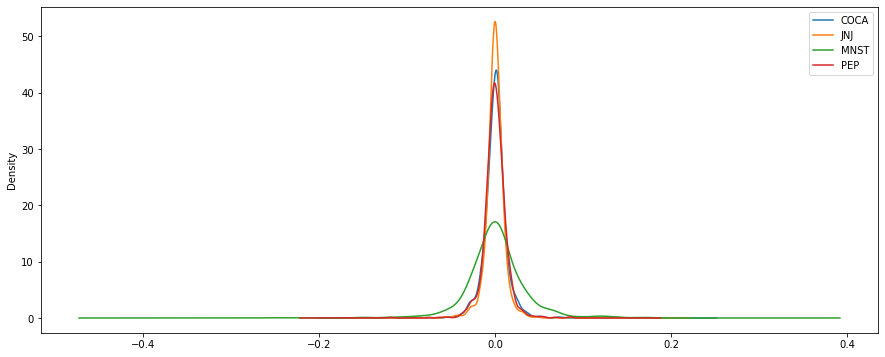

In [70]:
coca['returns'].plot(kind='kde', label = 'COCA', figsize = (15, 6))
jnj['returns'].plot(kind='kde', label = 'JNJ')
mnst['returns'].plot(kind='kde', label = 'MNST')
pep['returns'].plot(kind='kde', label = 'PEP')
plt.legend()

<AxesSubplot:>

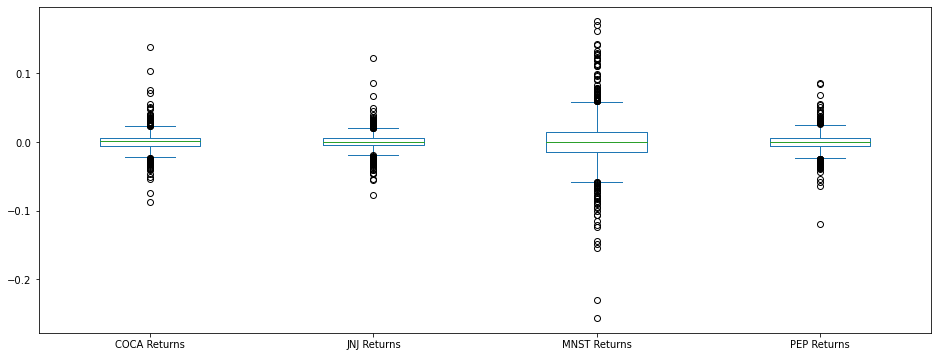

In [71]:
boxA_df = pd.concat([coca['returns'], jnj['returns'], mnst['returns'], pep['returns']], axis=1)
boxA_df.columns = ['COCA Returns', 'JNJ Returns', 'MNST Returns', 'PEP Returns']
boxA_df.plot(kind = 'box', figsize = (16,6))


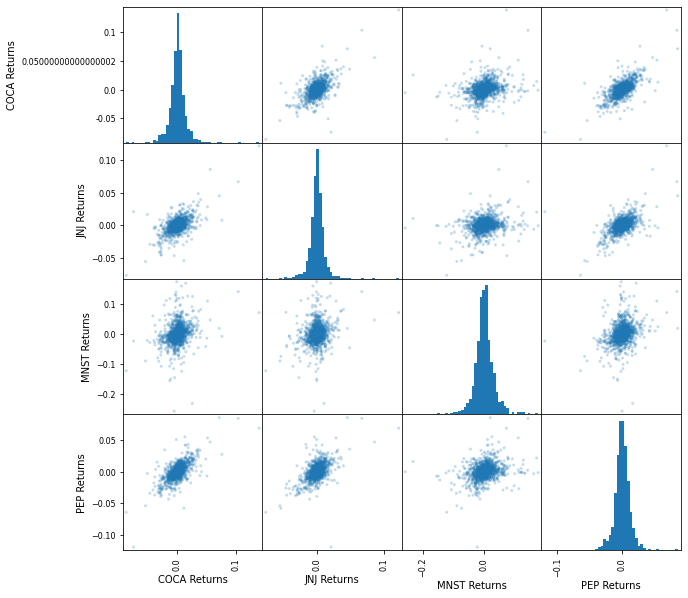

In [72]:
scatter_matrix(boxA_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [73]:
coca['cumulative_returns'] = (1 + coca['returns']).cumprod()
jnj['cumulative_returns'] = (1 + jnj['returns']).cumprod()
mnst['cumulative_returns'] = (1 + mnst['returns']).cumprod()
pep['cumulative_returns'] = (1 + pep['returns']).cumprod()


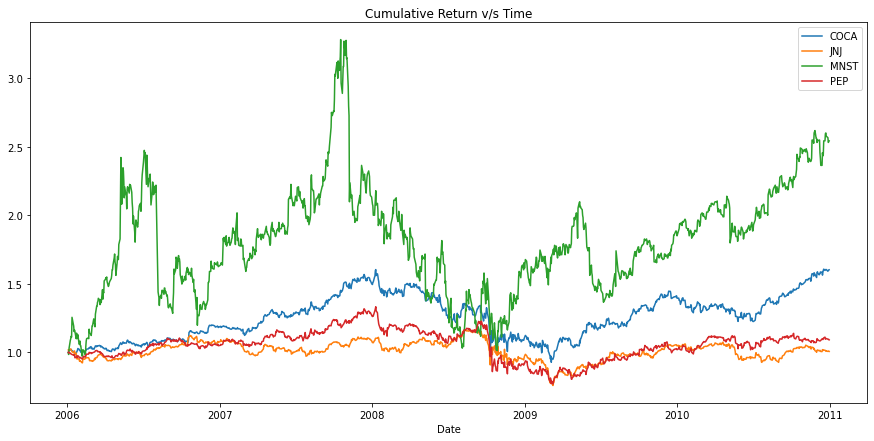

In [74]:
coca['cumulative_returns'].plot(label='COCA', figsize = (15, 7))
jnj['cumulative_returns'].plot(label='JNJ')
mnst['cumulative_returns'].plot(label='MNST')
pep['cumulative_returns'].plot(label='PEP')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()